# Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model,layers
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df1=pd.read_csv('fashion-mnist_train.csv')
df1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('Unique Class and # train samples :','\n',df1.label.value_counts())
print('Total Nan entries :',df1.isnull().sum().sum())

Unique Class and # train samples : 
 9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64
Total Nan entries : 0


1. Each label has 6000 training samples
2. There are no Nan entries

### Visualize the data

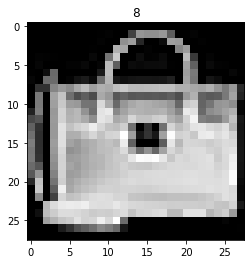

In [53]:
tx=df1.drop('label',axis=1)
ty=df1.label
img = tx.values[len(tx)-2].reshape(28,28)
plt.title(ty.values[len(tx)-2])
plt.imshow(img,cmap='gray')

In [5]:
tx=tx/225

### ANN for classification

In [7]:
tf.keras.backend.set_floatx('float64')

#Early stopping ronds - to prevent overfitting
es=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)

model1=tf.keras.Sequential(
[
    layers.Dense(900,activation="relu"),
    layers.Dense(800,activation="relu"),
    layers.Dropout(0.1),                                        # to prevent overfitting, reduces validation loss
    layers.Dense(1000,activation="relu"),
    layers.Dense(800,activation="relu"),
    layers.Dropout(0.1),
    
    layers.Dense(10,activation="softmax")
    
])
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
mdl1=model1.fit(tx,ty, epochs=30, batch_size=1000,validation_split=0.1,callbacks=[es,cp])


Epoch 1/30
54/54 [==============================] - 33s 602ms/step - loss: 0.6862 - accuracy: 0.7520 - val_loss: 0.4331 - val_accuracy: 0.8485
Epoch 2/30
54/54 [==============================] - 32s 600ms/step - loss: 0.3897 - accuracy: 0.8579 - val_loss: 0.3893 - val_accuracy: 0.8582
Epoch 3/30
54/54 [==============================] - 35s 639ms/step - loss: 0.3348 - accuracy: 0.8779 - val_loss: 0.3361 - val_accuracy: 0.8822
Epoch 4/30
54/54 [==============================] - 39s 716ms/step - loss: 0.3115 - accuracy: 0.8859 - val_loss: 0.3467 - val_accuracy: 0.8765
Epoch 5/30
54/54 [==============================] - 36s 675ms/step - loss: 0.2889 - accuracy: 0.8940 - val_loss: 0.3335 - val_accuracy: 0.8802
Epoch 6/30
54/54 [==============================] - 36s 671ms/step - loss: 0.2700 - accuracy: 0.9001 - val_loss: 0.3082 - val_accuracy: 0.8870
Epoch 7/30
54/54 [==============================] - 36s 666ms/step - loss: 0.2496 - accuracy: 0.9075 - val_loss: 0.3021 - val_accuracy: 0.8902

Epoch 28/30
54/54 [==============================] - 32s 593ms/step - loss: 0.1088 - accuracy: 0.9585 - val_loss: 0.4117 - val_accuracy: 0.8963
Epoch 29/30
54/54 [==============================] - 33s 608ms/step - loss: 0.1073 - accuracy: 0.9589 - val_loss: 0.3777 - val_accuracy: 0.9015
Epoch 30/30
54/54 [==============================] - 34s 637ms/step - loss: 0.1003 - accuracy: 0.9615 - val_loss: 0.3924 - val_accuracy: 0.8972


1. Training accuracy : 96.15 %
2. Training loss : 0.1003

3. Validation accuracy : 89.72%
4. Validation loss : 0.3924

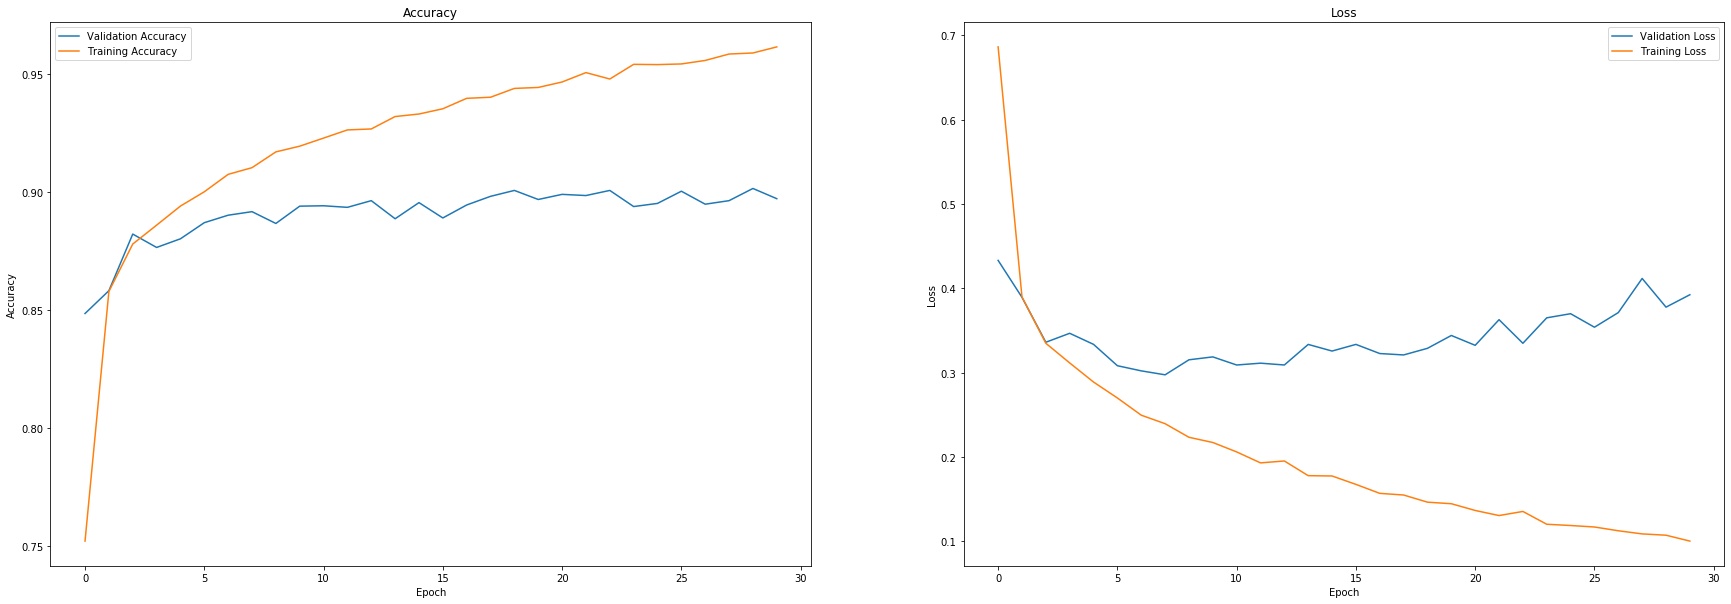

In [8]:
fig=plt.subplots(nrows=1,ncols=2,figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mdl1.history['val_accuracy'])
plt.plot(mdl1.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])

plt.subplot(1,2,2)
plt.plot(mdl1.history['val_loss'])
plt.plot(mdl1.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])

plt.show()

In [83]:
tf.keras.backend.set_floatx('float64')

tx2d = tx.values.reshape((-1, 28, 28, 1))
tx2d = tf.convert_to_tensor(tx2d,dtype=tf.float64)

es=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=5)

model2=tf.keras.Sequential(
[
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'),    
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
            
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.15),

    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.15),        
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10,activation="softmax")
    
])

model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
mdl2=model2.fit(tx2d,ty, epochs=50, batch_size=256,validation_split=0.2,callbacks=[es])


Epoch 1/50
188/188 [==============================] - 106s 566ms/step - loss: 1.8041 - accuracy: 0.6469 - val_loss: 0.5147 - val_accuracy: 0.8153
Epoch 2/50
188/188 [==============================] - 93s 494ms/step - loss: 0.5348 - accuracy: 0.7989 - val_loss: 0.4153 - val_accuracy: 0.8522
Epoch 3/50
188/188 [==============================] - 113s 603ms/step - loss: 0.4541 - accuracy: 0.8303 - val_loss: 0.3715 - val_accuracy: 0.8639
Epoch 4/50
188/188 [==============================] - 113s 601ms/step - loss: 0.4037 - accuracy: 0.8494 - val_loss: 0.3518 - val_accuracy: 0.8668
Epoch 5/50
188/188 [==============================] - 112s 598ms/step - loss: 0.3684 - accuracy: 0.8643 - val_loss: 0.3163 - val_accuracy: 0.8864
Epoch 6/50
188/188 [==============================] - 101s 538ms/step - loss: 0.3488 - accuracy: 0.8719 - val_loss: 0.3057 - val_accuracy: 0.8819
Epoch 7/50
188/188 [==============================] - 106s 564ms/step - loss: 0.3286 - accuracy: 0.8778 - val_loss: 0.2846 - 

1. Training accuracy : 94.83 %
2. Training loss : 0.1370

3. Validation accuracy : 91.93 %
4. Validation loss : 0.2727

Model2 a better validation accuracy and loss than Model1 

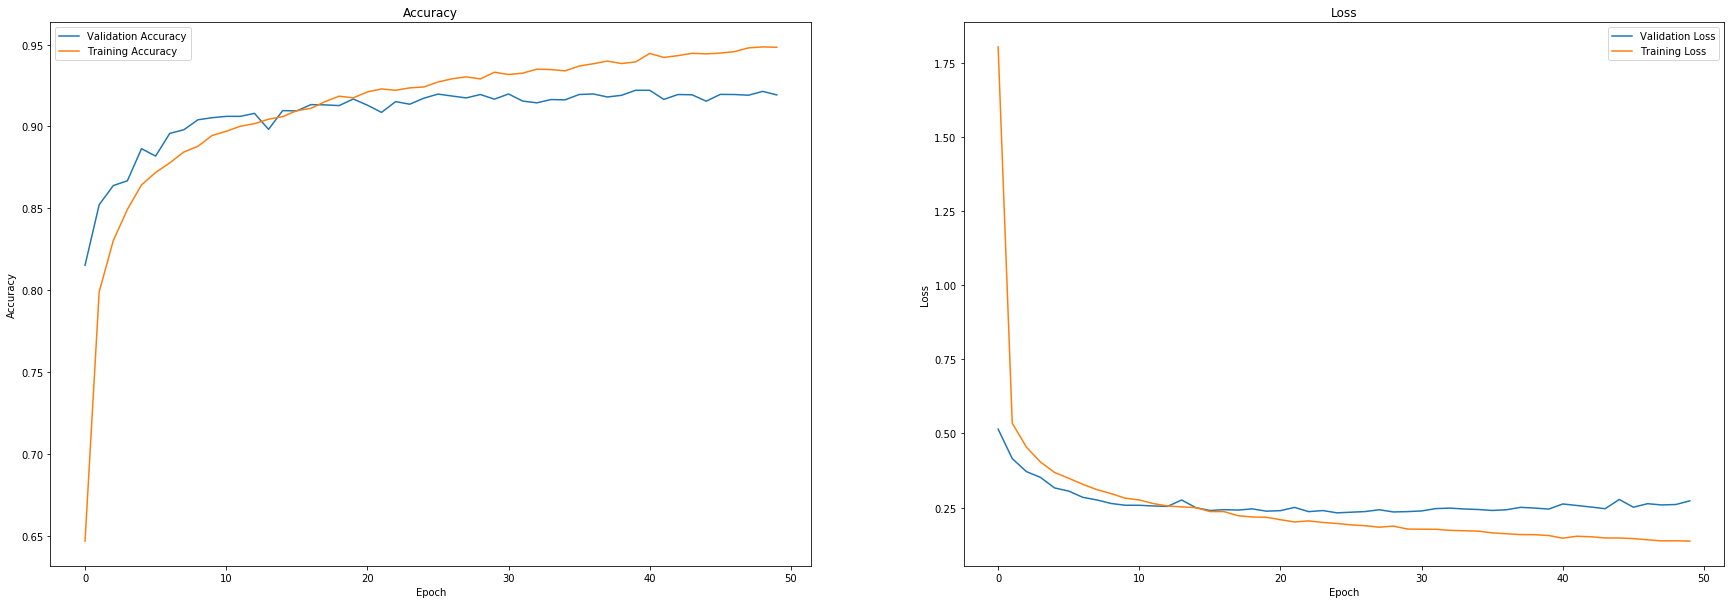

In [84]:
fig=plt.subplots(nrows=1,ncols=2,figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mdl2.history['val_accuracy'])
plt.plot(mdl2.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])

plt.subplot(1,2,2)
plt.plot(mdl2.history['val_loss'])
plt.plot(mdl2.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])

plt.show()